# Milestone 5

- Joshua Burden
- Bellevue University
- DSC540 Data Preparation
- Cathrine Williams
- 08/11/2022



#### Now that you have cleaned and transformed your 3 datasets, you need to load them into a database. You can choose what kind of database (SQLLite or MySQL, Postgre SQL are all free options). You will want to load each dataset into SQL Lite as an individual table and then you must join the datasets together in Python into 1 dataset.
#### Once all the data is merged together in your database, create 5 visualizations that demonstrate the data you have cleansed. You should have at least 2 visualizations that have data from more than one source (meaning, if you have 3 tables, you must have visualizations that span across 2 of the tables – you are also welcome to use your consolidated dataset that you created in the previous step, if you do that, you have met this requirement).
#### For the visualization portion of the project, you are welcome to use a python library like Matplotlib, Seaborn, or an R package ggPlot2, Plotly, or Tableau/PowerBI.
#### PowerBI is a free tool that could be used – Tableau only has a free web author. If your use Tableau/PowerBI you need to submit a PDF with your assignment vs the Tableau/PowerBI file. /p>
#### Clearly label each visualization. Submit your code for merging and storing in the database, with your code for the visualizations along with a 250-500-word summary of what you learned and had to do to complete the project. In your write-up, make sure to address the ethical implications of cleansing data and your project topic. You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results.


# Merging the Data and Storing in a Database/Visualizing Data

In [1]:
import sqlite3
import pandas as pd
import numpy as np

## Load data into tables 

In [29]:
csvData = pd.read_csv("./data/country_wise_latest.csv")
apiData = pd.read_csv("./data/vbim-akqf.csv")
webData = pd.read_csv("./data/webTable.csv")

In [30]:
csvData.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [31]:
apiData.head()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2021-12-31T00:00:00.000,2021-12-31T00:00:00.000,NaN,NaN,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Missing,Missing,Missing,Missing
1,2020-03-21T00:00:00.000,2020-03-30T00:00:00.000,NaN,2020-03-21T00:00:00.000,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Missing,Missing,Missing,Missing
2,2020-04-30T00:00:00.000,2020-05-05T00:00:00.000,NaN,NaN,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Missing,Missing,Missing,Missing
3,2021-04-27T00:00:00.000,2021-05-04T00:00:00.000,NaN,2021-04-27T00:00:00.000,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Yes,Missing,No,Missing
4,2021-01-25T00:00:00.000,2021-01-28T00:00:00.000,NaN,2021-01-25T00:00:00.000,Probable Case,Male,80+ Years,"White, Non-Hispanic",No,Missing,No,Missing


In [32]:
webData.head()

,Location,Cases,Deaths
0,World[a],"589,244,316","6,433,419"
1,European Union[b],"161,905,792","1,128,122"
2,United States,"92,838,677","1,036,990"
3,India,"44,239,372","526,996"
4,France,"34,253,699","153,133"


# Doing some additional clean up

In [33]:
# covid_df.drop(labels=['WHO Region'],axis=1,inplace=True)
csvData.drop(labels=['1 week % increase'],axis=1,inplace=True)
csvData.drop(labels=['Confirmed last week'],axis=1,inplace=True)
csvData.drop(labels=['1 week change'],axis=1,inplace=True)


In [34]:
apiData = apiData.rename(columns={'age_group':'Age Group',
                                      'cdc_case_earliest_dt':'CDC Case Earliest Date Time', 
                                      'cdc_report_dt':'CDC Report Date Time',
                                     'pos_spec_dt':'POS Spec Date Time',
                                     'onset_dt':'Onset Date Time',
                                     'current_status':'Current Status',
                                     'age_group':'Age Group',
                                     'race_ethnicity_combined':'Race/Ethnicity Combined',
                                     'hosp_yn':'Hospitalization',
                                     'icu_yn':'ICU',
                                     'death_yn':'Death',
                                     'medcond_yn':'Medical Condition'})

In [35]:
csvData = csvData.rename(columns={'Country/Region':'Geographical Location','Active':'Current Active Cases #'})

In [36]:
csvData.head()

,Geographical Location,Confirmed,Deaths,Recovered,Current Active Cases #,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,Africa


In [37]:
apiData.head()

,CDC Case Earliest Date Time,CDC Report Date Time,POS Spec Date Time,Onset Date Time,Current Status,sex,Age Group,Race/Ethnicity Combined,Hospitalization,ICU,Death,Medical Condition
0,2021-12-31T00:00:00.000,2021-12-31T00:00:00.000,NaN,NaN,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Missing,Missing,Missing,Missing
1,2020-03-21T00:00:00.000,2020-03-30T00:00:00.000,NaN,2020-03-21T00:00:00.000,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Missing,Missing,Missing,Missing
2,2020-04-30T00:00:00.000,2020-05-05T00:00:00.000,NaN,NaN,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Missing,Missing,Missing,Missing
3,2021-04-27T00:00:00.000,2021-05-04T00:00:00.000,NaN,2021-04-27T00:00:00.000,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Yes,Missing,No,Missing
4,2021-01-25T00:00:00.000,2021-01-28T00:00:00.000,NaN,2021-01-25T00:00:00.000,Probable Case,Male,80+ Years,"White, Non-Hispanic",No,Missing,No,Missing


In [38]:
apiData.dropna()

,CDC Case Earliest Date Time,CDC Report Date Time,POS Spec Date Time,Onset Date Time,Current Status,sex,Age Group,Race/Ethnicity Combined,Hospitalization,ICU,Death,Medical Condition
7,2021-02-15T00:00:00.000,2022-03-22T00:00:00.000,2021-02-22T00:00:00.000,2021-02-15T00:00:00.000,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",No,Missing,No,Yes
22,2021-01-02T00:00:00.000,2021-01-15T00:00:00.000,2021-01-06T00:00:00.000,2021-01-02T00:00:00.000,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Yes,Missing,No,Missing
32,2021-03-24T00:00:00.000,2021-12-03T00:00:00.000,2021-03-24T00:00:00.000,2021-03-24T00:00:00.000,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Yes,No,Yes,Yes
43,2021-01-14T00:00:00.000,2022-02-26T00:00:00.000,2021-01-14T00:00:00.000,2021-01-14T00:00:00.000,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",No,Missing,No,Yes
51,2022-01-01T00:00:00.000,2022-01-14T00:00:00.000,2022-01-11T00:00:00.000,2022-01-01T00:00:00.000,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Yes,Missing,Missing,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...
949,2021-12-19T00:00:00.000,2021-12-29T00:00:00.000,2021-12-29T00:00:00.000,2021-12-19T00:00:00.000,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Yes,Missing,Missing,Missing
952,2021-12-20T00:00:00.000,2022-01-03T00:00:00.000,2021-12-27T00:00:00.000,2021-12-20T00:00:00.000,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",No,Missing,No,Missing
953,2020-12-10T00:00:00.000,2021-01-07T00:00:00.000,2020-12-18T00:00:00.000,2020-12-10T00:00:00.000,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Yes,Missing,No,Missing
967,2021-09-05T00:00:00.000,2021-09-05T00:00:00.000,2021-09-04T00:00:00.000,2021-09-05T00:00:00.000,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",No,Missing,No,Missing


In [39]:
webData.dropna()

,Location,Cases,Deaths
0,World[a],"589,244,316","6,433,419"
1,European Union[b],"161,905,792","1,128,122"
2,United States,"92,838,677","1,036,990"
3,India,"44,239,372","526,996"
4,France,"34,253,699","153,133"
...,...,...,...
213,Wallis and Futuna,761,7
214,Marshall Islands,681,2
215,Vatican City,29,0
216,"Saint Helena, Ascension and Tristan da Cunha",4,0


In [67]:
# Load data into an SQL database, each as an individual table:
with sqlite3.connect('covid.db') as conn:
    cursor = conn.cursor()
    csvData.to_sql('csvData', conn, if_exists='replace', index=False)
    webData.to_sql('webData', conn, if_exists='replace', index=False)
    apiData.to_sql('apiData', conn, if_exists='replace', index=False)
    

/Users/joshua/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [68]:
csvData.head()

,Geographical Location,Confirmed,Deaths,Recovered,Current Active Cases #,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,Africa


In [69]:
apiData.head()

,CDC Case Earliest Date Time,CDC Report Date Time,POS Spec Date Time,Onset Date Time,Current Status,sex,Age Group,Race/Ethnicity Combined,Hospitalization,ICU,Death,Medical Condition
0,2021-12-31T00:00:00.000,2021-12-31T00:00:00.000,NaN,NaN,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Missing,Missing,Missing,Missing
1,2020-03-21T00:00:00.000,2020-03-30T00:00:00.000,NaN,2020-03-21T00:00:00.000,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Missing,Missing,Missing,Missing
2,2020-04-30T00:00:00.000,2020-05-05T00:00:00.000,NaN,NaN,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Missing,Missing,Missing,Missing
3,2021-04-27T00:00:00.000,2021-05-04T00:00:00.000,NaN,2021-04-27T00:00:00.000,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Yes,Missing,No,Missing
4,2021-01-25T00:00:00.000,2021-01-28T00:00:00.000,NaN,2021-01-25T00:00:00.000,Probable Case,Male,80+ Years,"White, Non-Hispanic",No,Missing,No,Missing


In [70]:
webData.head()

,Location,Cases,Deaths
0,World[a],"589,244,316","6,433,419"
1,European Union[b],"161,905,792","1,128,122"
2,United States,"92,838,677","1,036,990"
3,India,"44,239,372","526,996"
4,France,"34,253,699","153,133"


In [89]:
res = conn.execute('''SELECT name FROM sqlite_master WHERE type='table';''')
tableList = []
for name in res:
    print(name[0])
    tableList.append(name[0])

csvData
webData
apiData
combined_data


In [90]:
# combine into new table?
cons_data = pd.read_csv('./data/cons_dataset.csv')
with sqlite3.connect('covid.db') as conn:
    cursor = conn.cursor()
    cons_data.to_sql('combined_data', conn, if_exists='replace', index=False)

# Once all the data is merged together in your database, create 5 visualizations that demonstrate the data you have cleansed. You should have at least 2 visualizations that have data from more than one source (meaning, if you have 3 tables, you must have visualizations that span across 2 of the tables – you are also welcome to use your consolidated dataset that you created in the previous step, if you do that, you have met this requirement).


# visualization 1

In [48]:
def head(table, nRows=5):
    '''Prints the first n rows of the table specified'''
    cursor.execute(f'''SELECT * FROM {table}''')
    for row in cursor.fetchall()[:nRows]:
        print(row)

In [49]:
for i in tableList:
    print(f"Table: '{i}' - ")
    head(i, 3)
    print()

Table: 'csvData' - 
('Afghanistan', 36263, 1269, 25198, 9796, 106, 10, 18, 3.5, 69.49, 5.04, 'Eastern Mediterranean')
('Albania', 4880, 144, 2745, 1991, 117, 6, 63, 2.95, 56.25, 5.25, 'Europe')
('Algeria', 27973, 1163, 18837, 7973, 616, 8, 749, 4.16, 67.34, 6.17, 'Africa')

Table: 'webData' - 
('World[a]', '589,244,316', '6,433,419')
('European Union[b]', '161,905,792', '1,128,122')
('United States', '92,838,677', '1,036,990')

Table: 'apiData' - 
('2021-12-31T00:00:00.000', '2021-12-31T00:00:00.000', None, None, 'Laboratory-confirmed case', 'Male', '80+ Years', 'White, Non-Hispanic', 'Missing', 'Missing', 'Missing', 'Missing')
('2020-03-21T00:00:00.000', '2020-03-30T00:00:00.000', None, '2020-03-21T00:00:00.000', 'Laboratory-confirmed case', 'Male', '80+ Years', 'White, Non-Hispanic', 'Missing', 'Missing', 'Missing', 'Missing')
('2020-04-30T00:00:00.000', '2020-05-05T00:00:00.000', None, None, 'Laboratory-confirmed case', 'Male', '80+ Years', 'White, Non-Hispanic', 'Missing', 'Missing

In [50]:
import matplotlib.pyplot as plt



# visualization 2

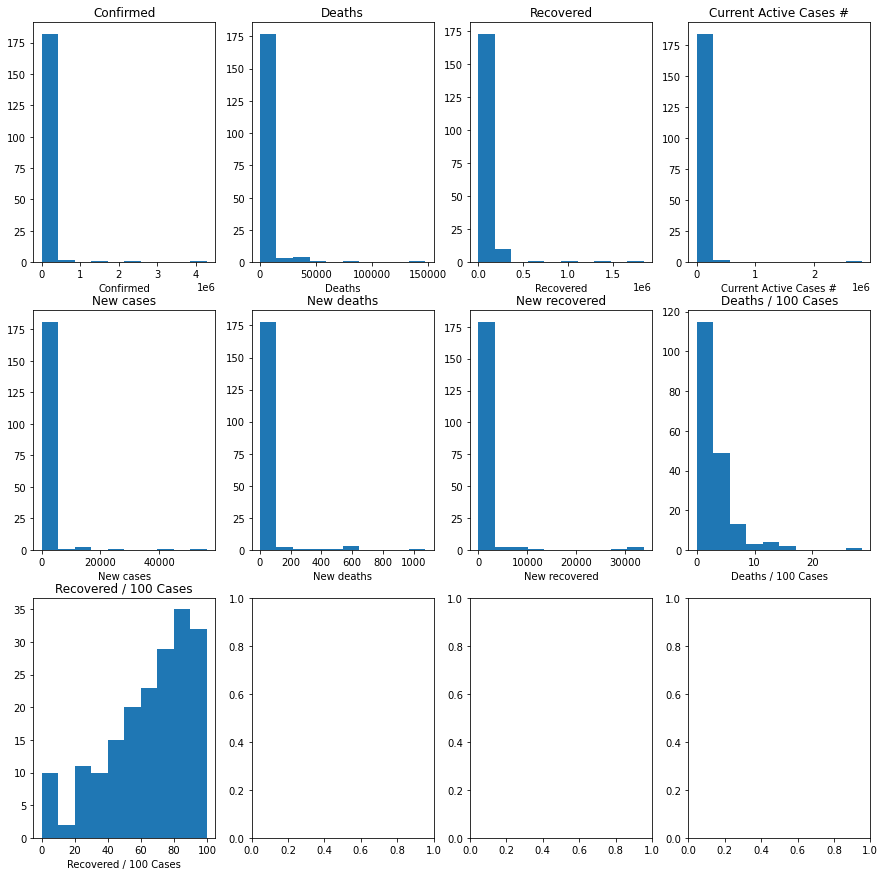

In [55]:
cols = csvData.columns
fig,ax = plt.subplots(3,4,figsize=(15,15))
col_in = 1
for i in range(3):
    for j in range(4):
        if col_in != 10:
            ax[i][j].hist(csvData[cols[col_in]])
            ax[i][j].set_title("{}".format(cols[col_in]))
            ax[i][j].set_xlabel(cols[col_in])
            #ax[i][j].set_ylabel(cols[col_in])
            col_in =col_in + 1

# visualization 3


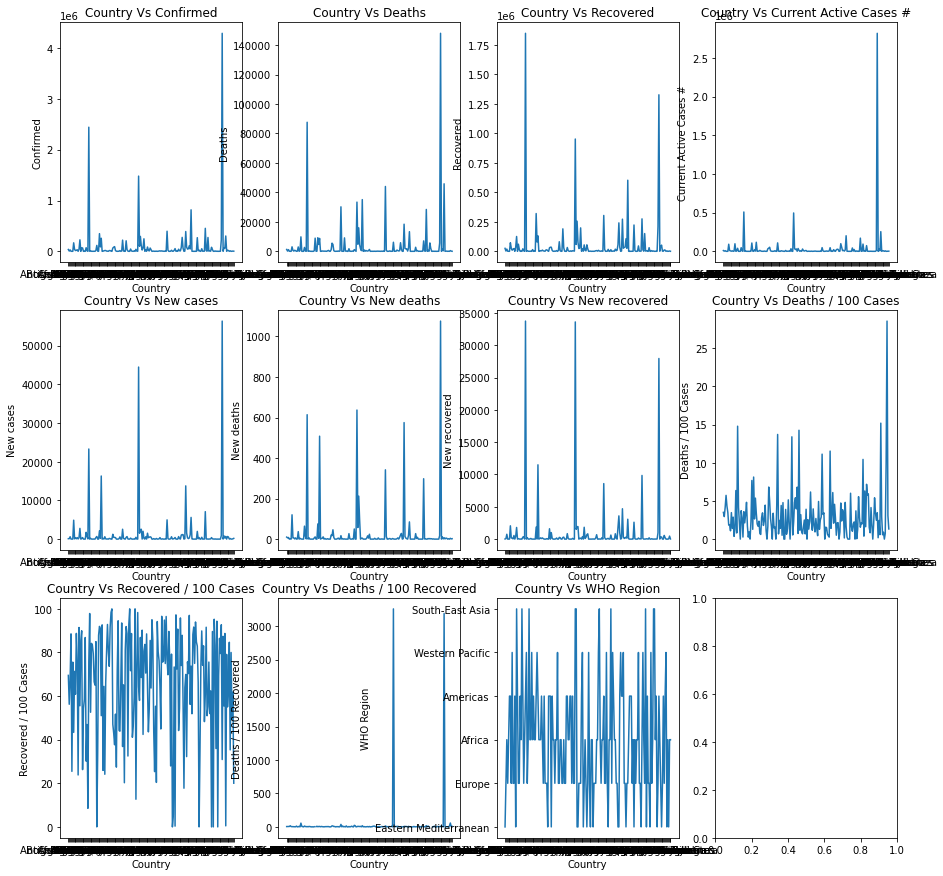

In [59]:
#Looking for outlier:
fig,ax = plt.subplots(3,4,figsize=(15,15))
col_in = 1
for i in range(3):
    for j in range(4):
        if col_in != 12:
            ax[i][j].plot(csvData['Geographical Location'],csvData[cols[col_in]])
            ax[i][j].set_title("Country Vs {}".format(cols[col_in]))
            ax[i][j].set_xlabel("Country")
            ax[i][j].set_ylabel(cols[col_in])
            col_in =col_in + 1

# visualization 4


In [92]:
cons_data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,...,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,Afghanistan,36263.0,1269.0,25198.0,9796.0,106.0,10.0,18.0,3.50,69.49,...,NaN,NaN,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Missing,Missing,Missing,Missing
1,Albania,4880.0,144.0,2745.0,1991.0,117.0,6.0,63.0,2.95,56.25,...,NaN,2020-03-21T00:00:00.000,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Missing,Missing,Missing,Missing
2,Algeria,27973.0,1163.0,18837.0,7973.0,616.0,8.0,749.0,4.16,67.34,...,NaN,NaN,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Missing,Missing,Missing,Missing
3,Andorra,907.0,52.0,803.0,52.0,10.0,0.0,0.0,5.73,88.53,...,NaN,2021-04-27T00:00:00.000,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Yes,Missing,No,Missing
4,Angola,950.0,41.0,242.0,667.0,18.0,1.0,0.0,4.32,25.47,...,NaN,2021-01-25T00:00:00.000,Probable Case,Male,80+ Years,"White, Non-Hispanic",No,Missing,No,Missing


In [94]:
pd.set_option("display.max_rows",1000)
cons_data.groupby(by='Confirmed').count()

,Country/Region,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,...,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
Confirmed,,,,,,,,,,,,,,,,,,,,,
10.0,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,1
12.0,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
14.0,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
17.0,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,1
18.0,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
20.0,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,1
23.0,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
24.0,2,2,2,2,2,2,2,2,2,2,...,0,2,2,2,2,2,2,2,2,2
27.0,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1


/Users/joshua/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


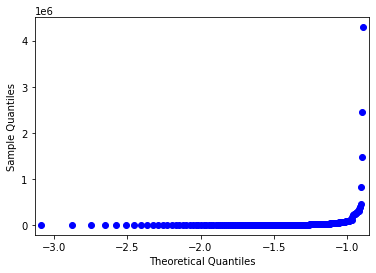

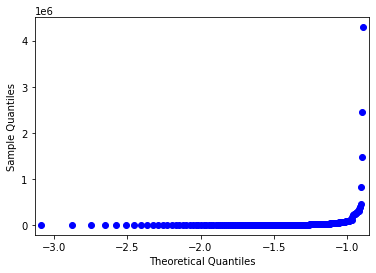

In [97]:
from statsmodels.graphics.gofplots import qqplot
qqplot(cons_data['Confirmed'],line='s')

# visualization 5

In [107]:
csvData.head()

,Geographical Location,Confirmed,Deaths,Recovered,Current Active Cases #,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,Africa


[Text(0.5, 0, 'Gelographical Location'),
 Text(0, 0.5, 'TotalCases(in Millions)')]

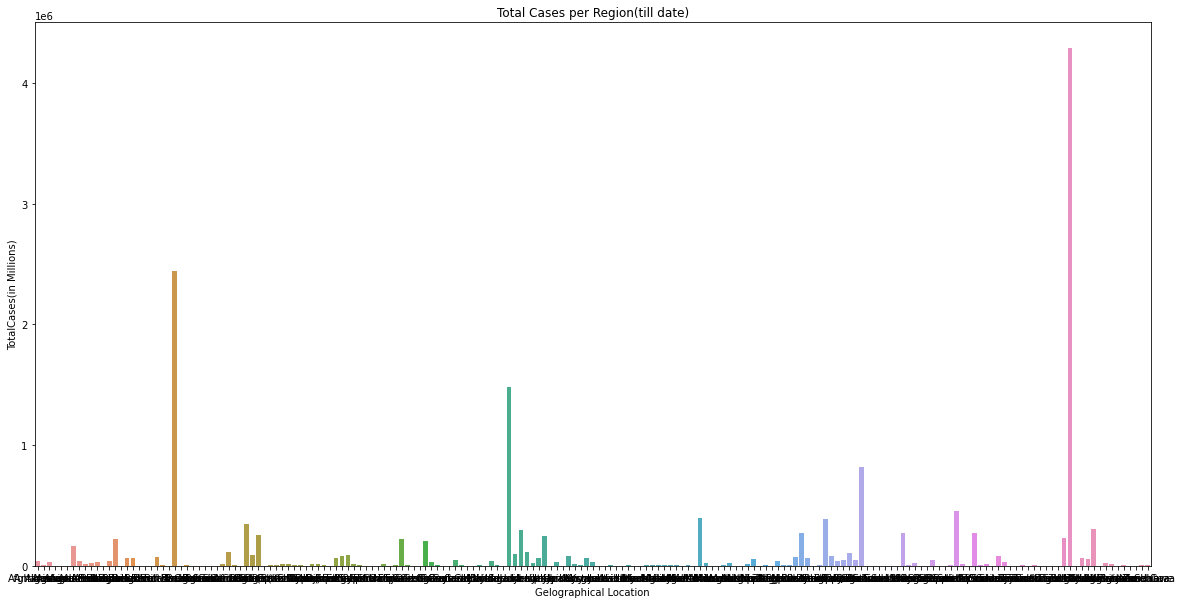

In [109]:
#Bar plot of Total Covid Cases per State
import seaborn as sns
plt.rcParams['figure.figsize'] = [20, 10]

x=csvData['Geographical Location']
y=csvData['Confirmed']
x_pos = np.arange(len(x))
plt.title('Total Cases per Region(till date)')
plt.xticks(x_pos, x)
barplotprob=sns.barplot(x=x,y=y)
barplotprob.set(xlabel="Gelographical Location", ylabel = "TotalCases(in Millions)")

# Clearly label each visualization. Submit your code for merging and storing in the database, with your code for the visualizations along with a 250-500-word summary of what you learned and had to do to complete the project. In your write-up, make sure to address the ethical implications of cleansing data and your project topic. You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results.


Milestone stone 5 was honestly a difficult and time-consuming process of finding, curating, cleaning, and second guessing my data and skills to transform the data into something that is readable and easy to understand. I still believe that I have quite a ways to even consider data science as a viable career option. I struggled quite a bit with the sql side of things with python as I generally at this time see more data being used in a NoSQL setting, and the SQL query side of things became a bit fuzzy for me to remember how to do things and manipulate the tables properly. I found that the data being transferred over that I had cleaned previously was also not cleaned when I got it over because I forgot to have all the transformations done from previous sections in the milestone 5.

Ethical considerations for this are difficult to decide in this report as the data is public and this is either self-reported or reported through some sort of agency that does not need to worry about ethics of the report after the fact. I found that working with this data was not a terrible task about asking the ethics of the dataset, as it is something that statistically speaking is publicly available and did not indulge on any other facts about the cases except perhaps time, which honestly could not be broken down in such a way that could be used to target or identify a single individual. 
